# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

import mu2

import helium4plusplus as he4

In [2]:
ELL = 0

rg_flow = np.loadtxt('datfiles/rg-flow-semilocal.dat')

In [4]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
# X = he4.FACTOR * he4.BETA6 # K•Å^3

In [6]:
nR = rg_flow.shape[0]
a0s = np.zeros(nR)
r0s = np.zeros(nR)
spectra = []
b2s = np.zeros(nR)

for i in range(nR):
    R, glo, gnlo = rg_flow[i]
    s = he4.SemiLocalHelium4System(R, ELL, 2, 6, 6, nq=200)
    a0, r0 = s.a0_and_r0(glo, gnlo, momenta, use_c=True)
    spec = s.bound_state_spectrum(glo, gnlo)
    spectra.append(spec)
    b2 = np.abs(spec[0])
    
    a0s[i] = a0
    r0s[i] = r0
    b2s[i] = b2

    print(f'{a0:.4e}  {r0:.4e}  {b2:.4e}')

1.0344e+02  7.3901e+00  1.2228e-03
1.1285e+02  7.4294e+00  1.0209e-03
1.2476e+02  7.4750e+00  8.2978e-04
1.2851e+02  7.4871e+00  7.8070e-04
1.0141e+02  7.3823e+00  1.2741e-03
5.7034e+01  6.9650e+00  4.2683e-03
1.9012e-01  5.1295e+04  3.8704e-01
1.7296e+01  5.8545e+00  6.5397e-02
1.2007e+01  5.1091e+00  1.6668e-01
9.4019e+00  4.5754e+00  3.2529e-01
7.4480e+00  4.0966e+00  6.3368e-01
5.9020e+00  3.7354e+00  1.2459e+00
4.6462e+00  3.6597e+00  2.4064e+00
3.5458e+00  4.3440e+00  4.4840e+00
2.4818e+00  7.9836e+00  7.8905e+00
1.2706e+00  4.0320e+01  1.2893e+01
-6.6583e-01  2.5111e+02  1.9777e+01
-8.2115e+00  1.3799e+01  2.8688e+01
1.3425e+01  5.1067e+00  1.1905e-01
5.5649e+00  3.6499e+00  1.4261e+00
3.8109e+00  4.1405e+00  4.3252e+00
2.9235e+00  6.0098e+00  8.5257e+00
2.3574e+00  9.4087e+00  1.3576e+01
1.8365e+00  1.7089e+01  1.9922e+01
1.2309e+00  4.5977e+01  2.8417e+01


KeyboardInterrupt: 

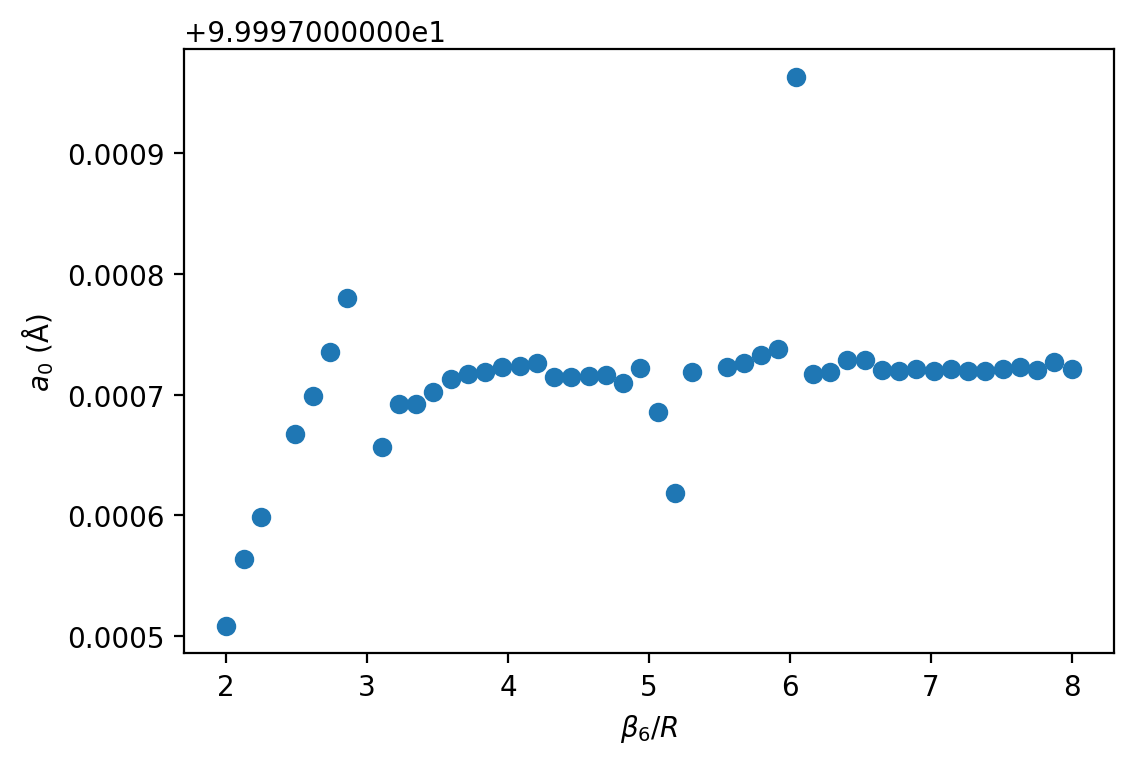

In [21]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], a0s)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$a_0$ (Å)');

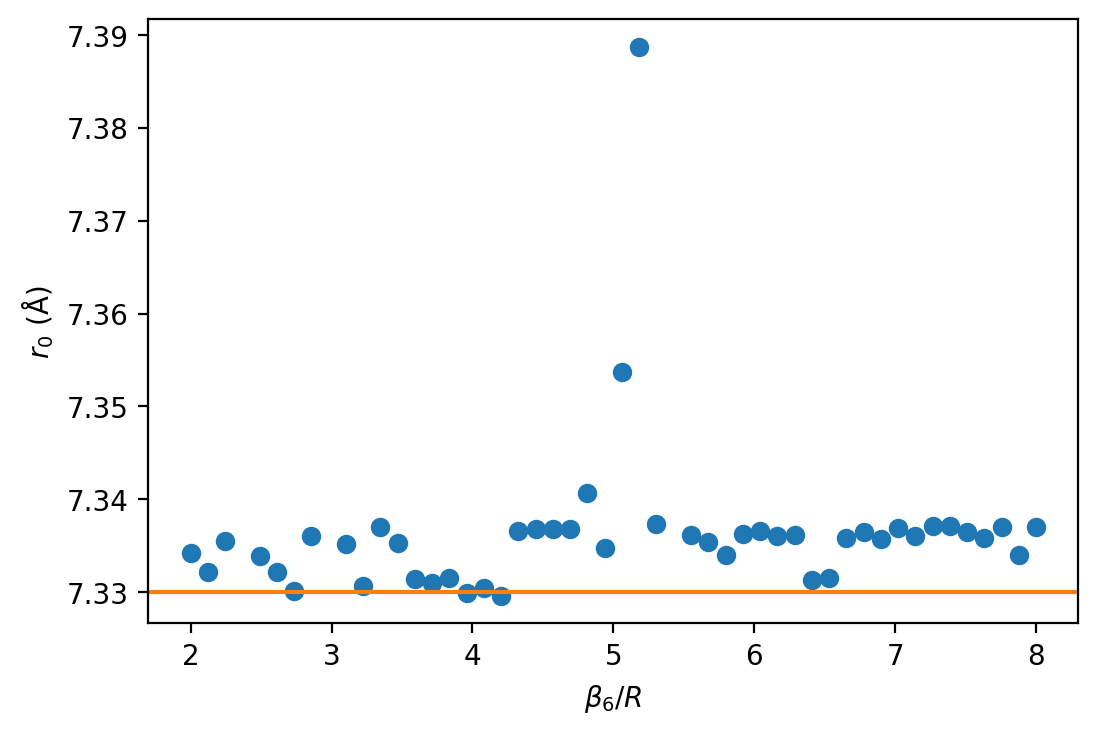

In [22]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], r0s)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')
ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [29]:
for (i, ratio) in enumerate(he4.BETA6/rg_flow[:, 0]):
    print(i, ratio)

0 2.0
1 2.1224489795918364
2 2.2448979591836733
3 2.489795918367347
4 2.6122448979591835
5 2.734693877551021
6 2.857142857142857
7 3.1020408163265305
8 3.2244897959183674
9 3.346938775510204
10 3.4693877551020407
11 3.591836734693878
12 3.714285714285714
13 3.836734693877551
14 3.959183673469387
15 4.081632653061225
16 4.20408163265306
17 4.326530612244898
18 4.448979591836734
19 4.571428571428571
20 4.6938775510204085
21 4.816326530612245
22 4.938775510204082
23 5.061224489795918
24 5.183673469387755
25 5.3061224489795915
26 5.551020408163265
27 5.673469387755102
28 5.795918367346938
29 5.918367346938775
30 6.040816326530612
31 6.163265306122449
32 6.285714285714285
33 6.408163265306122
34 6.530612244897958
35 6.653061224489795
36 6.775510204081632
37 6.8979591836734695
38 7.020408163265307
39 7.142857142857142
40 7.26530612244898
41 7.387755102040816
42 7.510204081632653
43 7.632653061224489
44 7.755102040816326
45 7.877551020408164
46 8.0


In [37]:
rg_flow[index, 0], he4.BETA6/rg_flow[index, 0]

(0.84850390625, 6.530612244897958)

In [38]:
rg_flow[index]

array([   0.84850391,  267.66115624, -278.855     ])

In [35]:
index = 34
for x in (a0s[index], r0s[index], *spectra[index]):
    print(f'{x:.3e}')

1.000e+02
7.332e+00
-1.311e-03
-7.248e+01
-6.355e+02


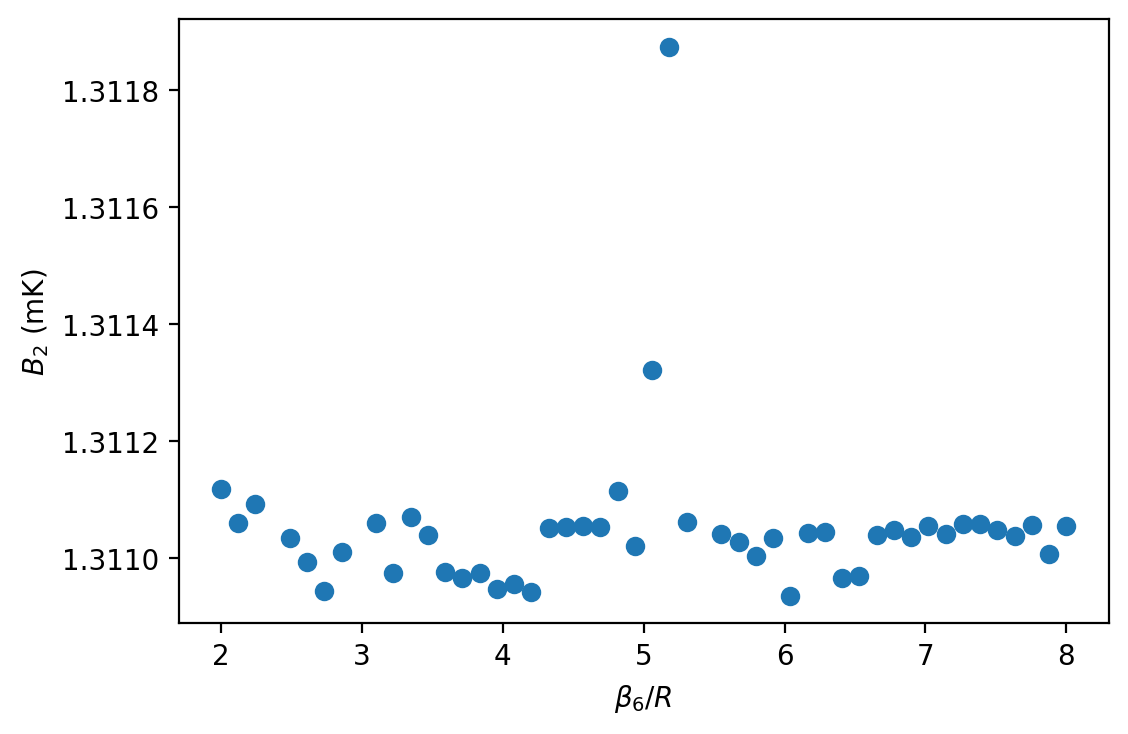

In [23]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], b2s*1000)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');

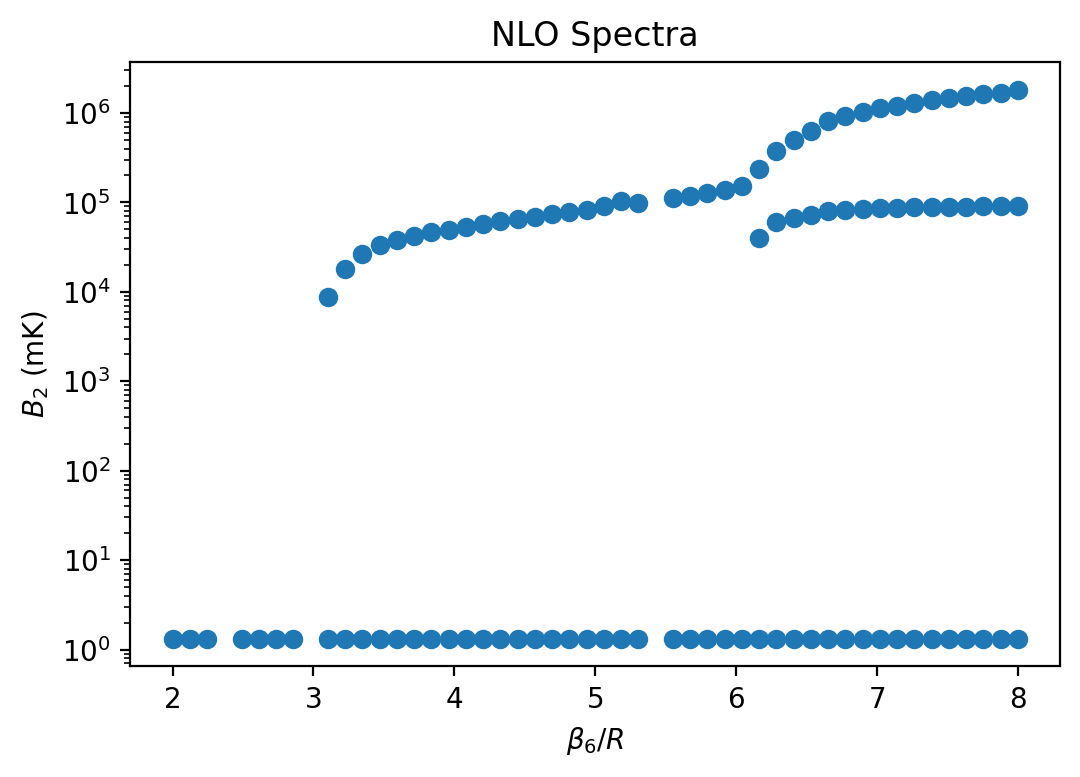

In [24]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for (R, spec) in zip(rg_flow[:, 0], spectra):
    for s in spec:
        ax.scatter(he4.BETA6/R, -1000*s, color='C0')
        
ax.set_yscale('log')
# ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_title('NLO Spectra')
ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');

Hmm, I don't see anything suspicious. What about NLO?

In [10]:
ELL = 0

rg_flow = np.loadtxt('datfiles/rg-flow-plus-1.dat')

In [11]:
rg_flow.shape

(27, 3)

In [12]:
Rs = rg_flow[:, 0]

In [13]:
nR = rg_flow.shape[0]
a0s = np.zeros(nR)
r0s = np.zeros(nR)
spectra = []

for i in range(nR):
    R, glo, gnlo = rg_flow[i]
    s = he4.Helium4System(R, ELL)
    a0, r0 = s.a0_and_r0(glo, gnlo, momenta, use_c=True)
    spec = s.bound_state_spectrum(glo, gnlo)
    b2 = np.abs(spec[0])
    
    a0s[i] = a0
    r0s[i] = r0
    spectra.append(spec)

    print(f'{a0:.4e}  {r0:.4e}  {b2:.4e}')

9.9994e+01  7.3335e+00  1.3111e-03
9.9994e+01  7.3337e+00  1.3111e-03
9.9998e+01  7.3389e+00  1.3111e-03
9.9998e+01  7.3379e+00  1.3111e-03
9.9998e+01  7.3327e+00  1.3110e-03
9.9998e+01  7.3342e+00  1.3110e-03
9.9998e+01  7.3368e+00  1.3110e-03
9.9998e+01  7.3357e+00  1.3110e-03
9.9998e+01  7.3285e+00  1.3109e-03
9.9998e+01  7.3328e+00  1.3110e-03
9.9998e+01  7.3284e+00  1.3109e-03
9.9998e+01  7.3347e+00  1.3110e-03
9.9998e+01  7.3350e+00  1.3110e-03
9.9998e+01  7.3341e+00  1.3110e-03
9.9998e+01  7.3362e+00  1.3110e-03
9.9998e+01  7.3297e+00  1.3109e-03
9.9998e+01  7.3325e+00  1.3110e-03
9.9998e+01  7.3310e+00  1.3110e-03
9.9998e+01  7.3371e+00  1.3111e-03
9.9998e+01  7.3363e+00  1.3110e-03
9.9998e+01  7.3314e+00  1.3110e-03
9.9998e+01  7.3775e+00  1.3117e-03
9.9998e+01  7.3335e+00  1.3110e-03
9.9998e+01  7.3326e+00  1.3110e-03
9.9998e+01  7.3336e+00  1.3110e-03
9.9998e+01  7.2243e+00  1.3093e-03
9.9998e+01  7.3358e+00  1.3110e-03


In [14]:
for (i, R) in enumerate(rg_flow[:, 0]):
    print(i, R)

0 1.859734589041096
1 1.7863240131578948
2 1.718488924050633
3 1.6556173780487806
4 1.5971838235294118
5 1.5427343749999998
6 1.491875
7 1.4442619680851063
8 1.35760625
9 1.3180643203883498
10 1.280760613207547
11 1.2455103211009175
12 1.2121484375
13 1.1805271739130434
14 1.1505137711864406
15 1.1219886363636362
16 1.0948437500000001
17 1.0689812992125984
18 1.0443125
19 1.0207565789473683
20 0.9560607394366198
21 0.9173015202702703
22 0.8815625000000001
23 0.84850390625
24 0.8178350903614459
25 0.7627001404494381
26 0.7259926470588236


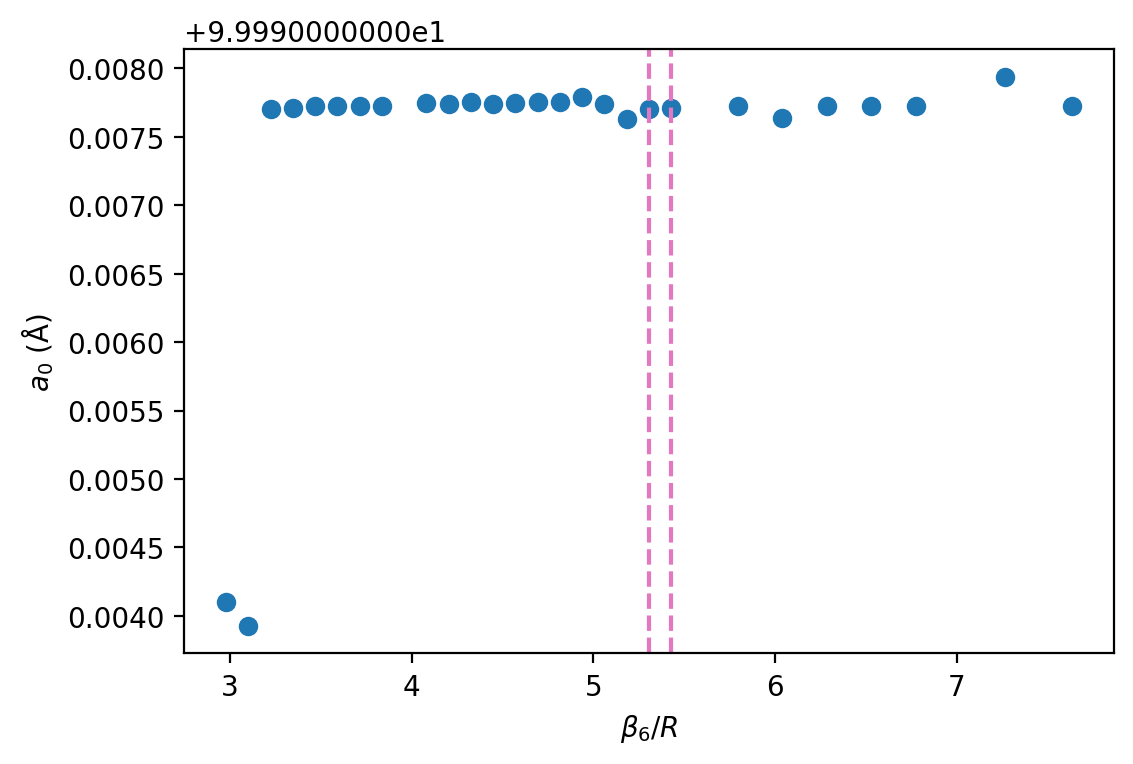

In [15]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], a0s)
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$a_0$ (Å)');

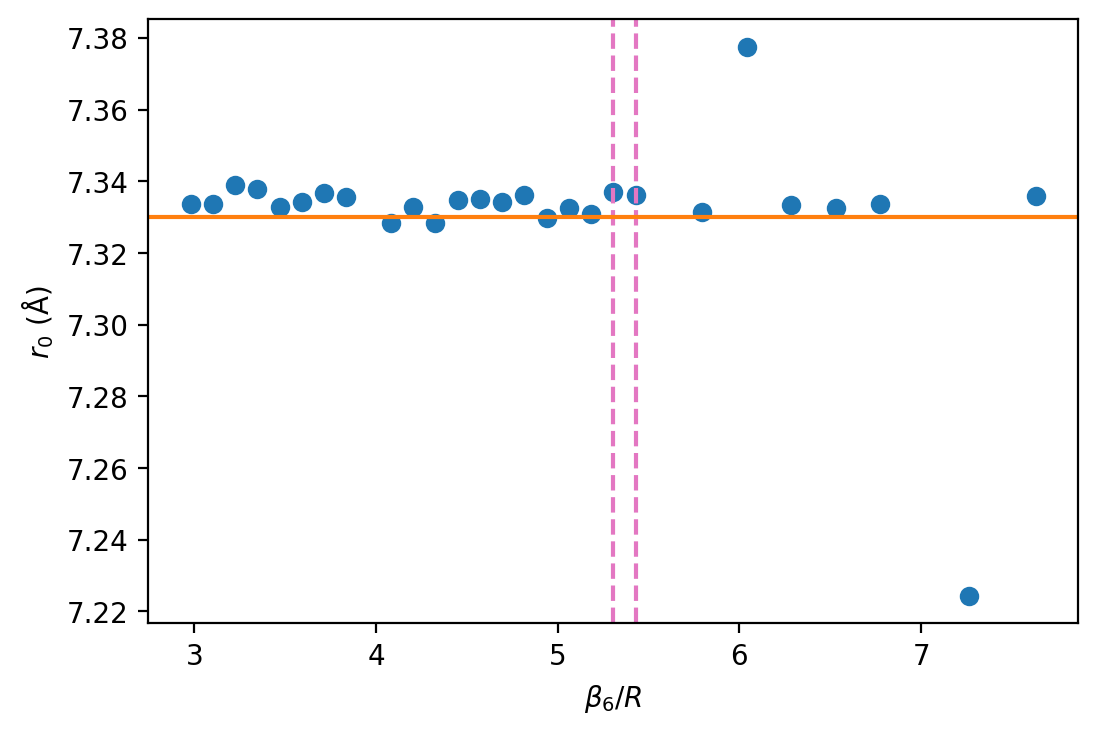

In [16]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], r0s)
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

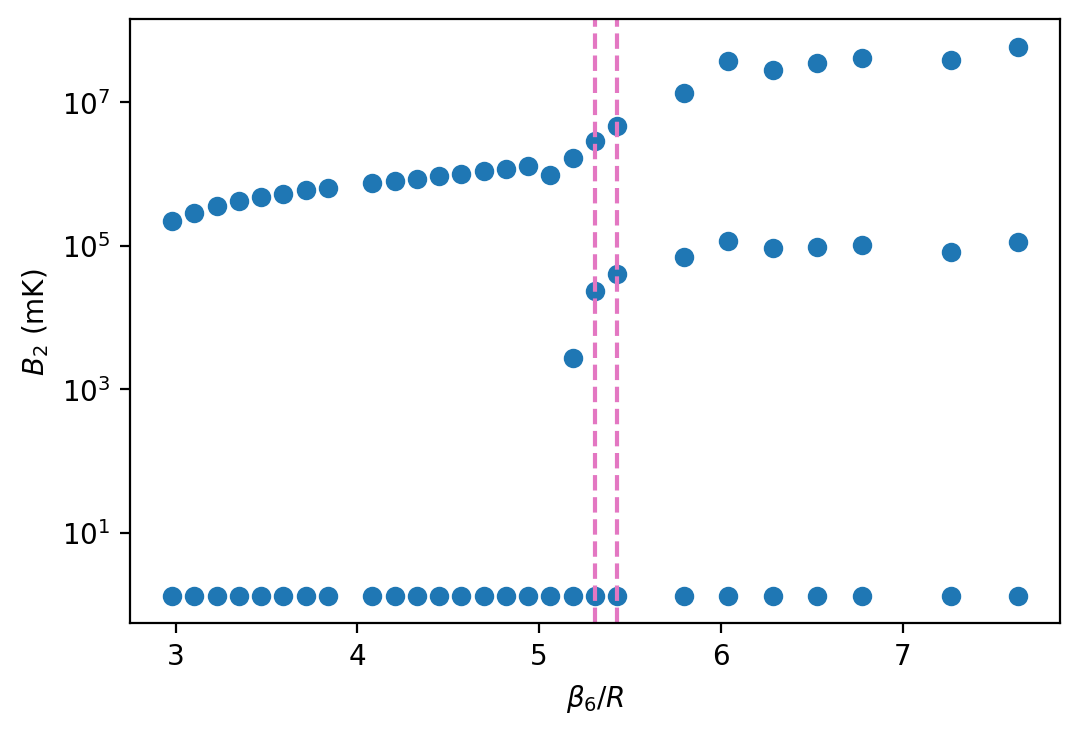

In [17]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for (R, spec) in zip(rg_flow[:, 0], spectra):
    for s in spec:
        ax.scatter(he4.BETA6/R, -1000*s, color='C0')
        
ax.set_yscale('log')
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');

In [25]:
from tqdm import tqdm

In [27]:
kcds_nlo = np.zeros((nR, momenta.size))

for i in tqdm(range(nR)):
    R, glo, gnlo = rg_flow[i]
    s = he4.Helium4System(R, ELL)
    kcds_nlo[i] = s.kcotd_gen_fast(momenta, glo, gnlo)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:49<00:00,  2.34s/it]


In [31]:
spectra[-1]

array([-1.31096955e-03, -7.07440204e+01, -1.33349580e+04])

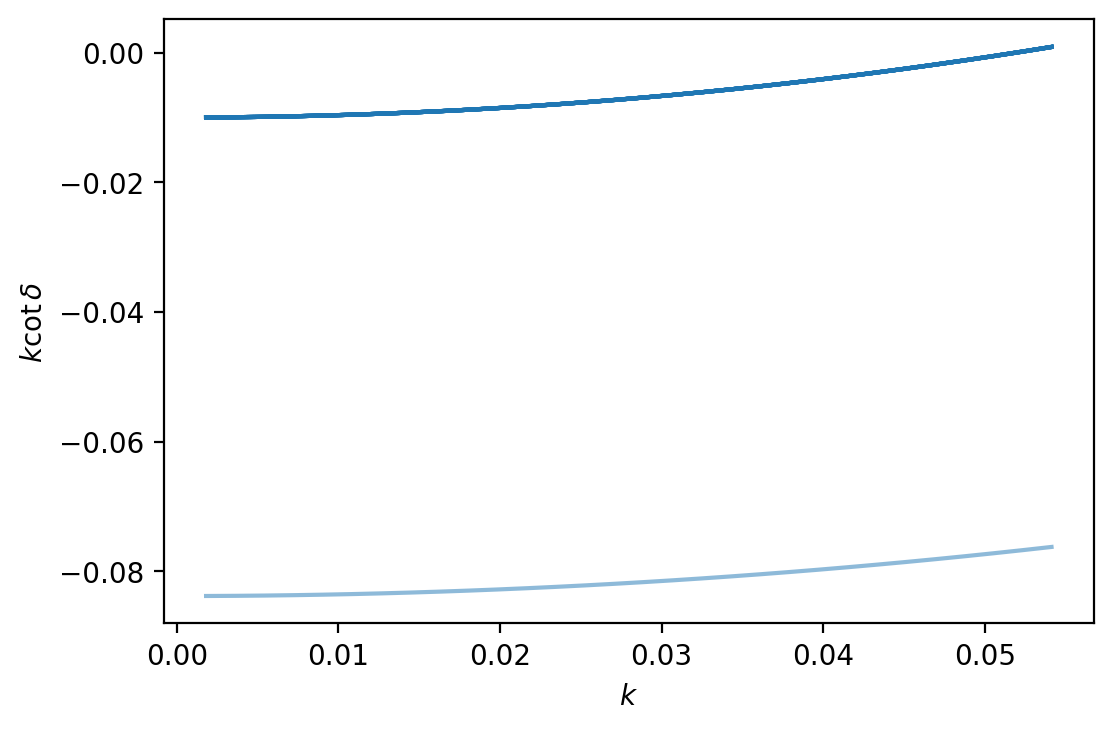

In [30]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in kcds_nlo:
    ax.plot(momenta, row, alpha=0.5)

ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$k\cot\delta$');